# EDA

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Ratings

- `time`: 유저가 영화를 평가한(interaction)time, 시간 x

- `dates` : `time` 열을 Unix 타임스탬프에서 datetime 형식으로 변환

- `date` : 날짜에서 시간 정보 제외

- `year` : 평가 년

- `month` : 평가 월

- `day` : 평가 일

- `date_count` : 유저가 날짜별 인터렉션한 횟수


In [2]:
data_path = '/data/ephemeral/data/train'

train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [3]:
# time 
train_df['dates'] = pd.to_datetime(train_df['time'], unit='s')
train_df['date'] = train_df['dates'].dt.date
train_df['year'] = train_df['dates'].dt.year
train_df['month'] = train_df['dates'].dt.month
train_df['day'] = train_df['dates'].dt.day

# 유저별 상호작용 날짜 카운트 
train_df['date_count'] = train_df.groupby('user')['date'].transform('nunique')
train_df

,user,item,time,dates,date,year,month,day,date_count
0,11,4643,1230782529,2009-01-01 04:02:09,2009-01-01,2009,1,1,5
1,11,170,1230782534,2009-01-01 04:02:14,2009-01-01,2009,1,1,5
2,11,531,1230782539,2009-01-01 04:02:19,2009-01-01,2009,1,1,5
3,11,616,1230782542,2009-01-01 04:02:22,2009-01-01,2009,1,1,5
4,11,2140,1230782563,2009-01-01 04:02:43,2009-01-01,2009,1,1,5
...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,2009-12-07,2009,12,7,11
5154467,138493,4958,1260209482,2009-12-07 18:11:22,2009-12-07,2009,12,7,11
5154468,138493,68319,1260209720,2009-12-07 18:15:20,2009-12-07,2009,12,7,11
5154469,138493,40819,1260209726,2009-12-07 18:15:26,2009-12-07,2009,12,7,11


In [4]:
# 각 유저별 date_count 값 추출하고 그 개수 세기 약 30% 하루에 모두 평가

user_date_count_df = train_df.groupby('user')['date_count'].unique().reset_index()
user_date_count_df.columns = ['user', 'unique_date_counts']
user_date_count_df['unique_date_counts'].value_counts() 


[1]      10097
[2]       5128
[3]       2577
[4]       1687
[5]       1175
         ...  
[640]        1
[360]        1
[512]        1
[467]        1
[272]        1
Name: unique_date_counts, Length: 390, dtype: int64

---

## 2. side

### 2-1) years 

- `item` : 영화 id.
- `year` : 해당 영화가 개봉한 연도

- rating 데이터 기준 갯수가 데이터 갯수 8개 부족함 > title에서 정규식을 이용해서 처리

In [5]:
print("Year data shape: ", year_data.shape)
print("Number of unique items in year_df: ", year_data['item'].nunique())
print("Number of unique years: ", year_data['year'].nunique())

print ("\nStatistics of year data: ")
year_data['year'].describe()

Year data shape:  (6799, 2)
Number of unique items in year_df:  6799
Number of unique years:  93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

---

### 2-2) title 

- `item` : 영화 id.
- `titles` : 영화 제목.
- `title_year` : 해당 영화가 개봉한 연도 (정규 표현식을 이용하여 추출)

In [6]:
# title 컬럼에서 연도를 추출하여 year_t 컬럼 생성
title_data['title_year'] = title_data['title'].str.extract(r'\((\d{4})') 

# 'year_t' 열의 데이터 타입을 int64로 변경
title_data['title_year'] = title_data['title_year'].astype('int64')

In [7]:
title_data.info()
title_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item        6807 non-null   int64 
 1   title       6807 non-null   object
 2   title_year  6807 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 159.7+ KB


,item,title,title_year
0,318,"Shawshank Redemption, The (1994)",1994
1,2571,"Matrix, The (1999)",1999
2,2959,Fight Club (1999),1999
3,296,Pulp Fiction (1994),1994
4,356,Forrest Gump (1994),1994


In [8]:
print("title data shape: ", title_data.shape)
print("Number of unique items in title_df: ", title_data['item'].nunique())
print("Number of unique titles: ", title_data['title'].nunique())

print ("\nStatistics of title data: ")
title_data['title'].describe()

title data shape:  (6807, 3)
Number of unique items in title_df:  6807
Number of unique titles:  6806

Statistics of title data: 


count                         6807
unique                        6806
top       War of the Worlds (2005)
freq                             2
Name: title, dtype: object

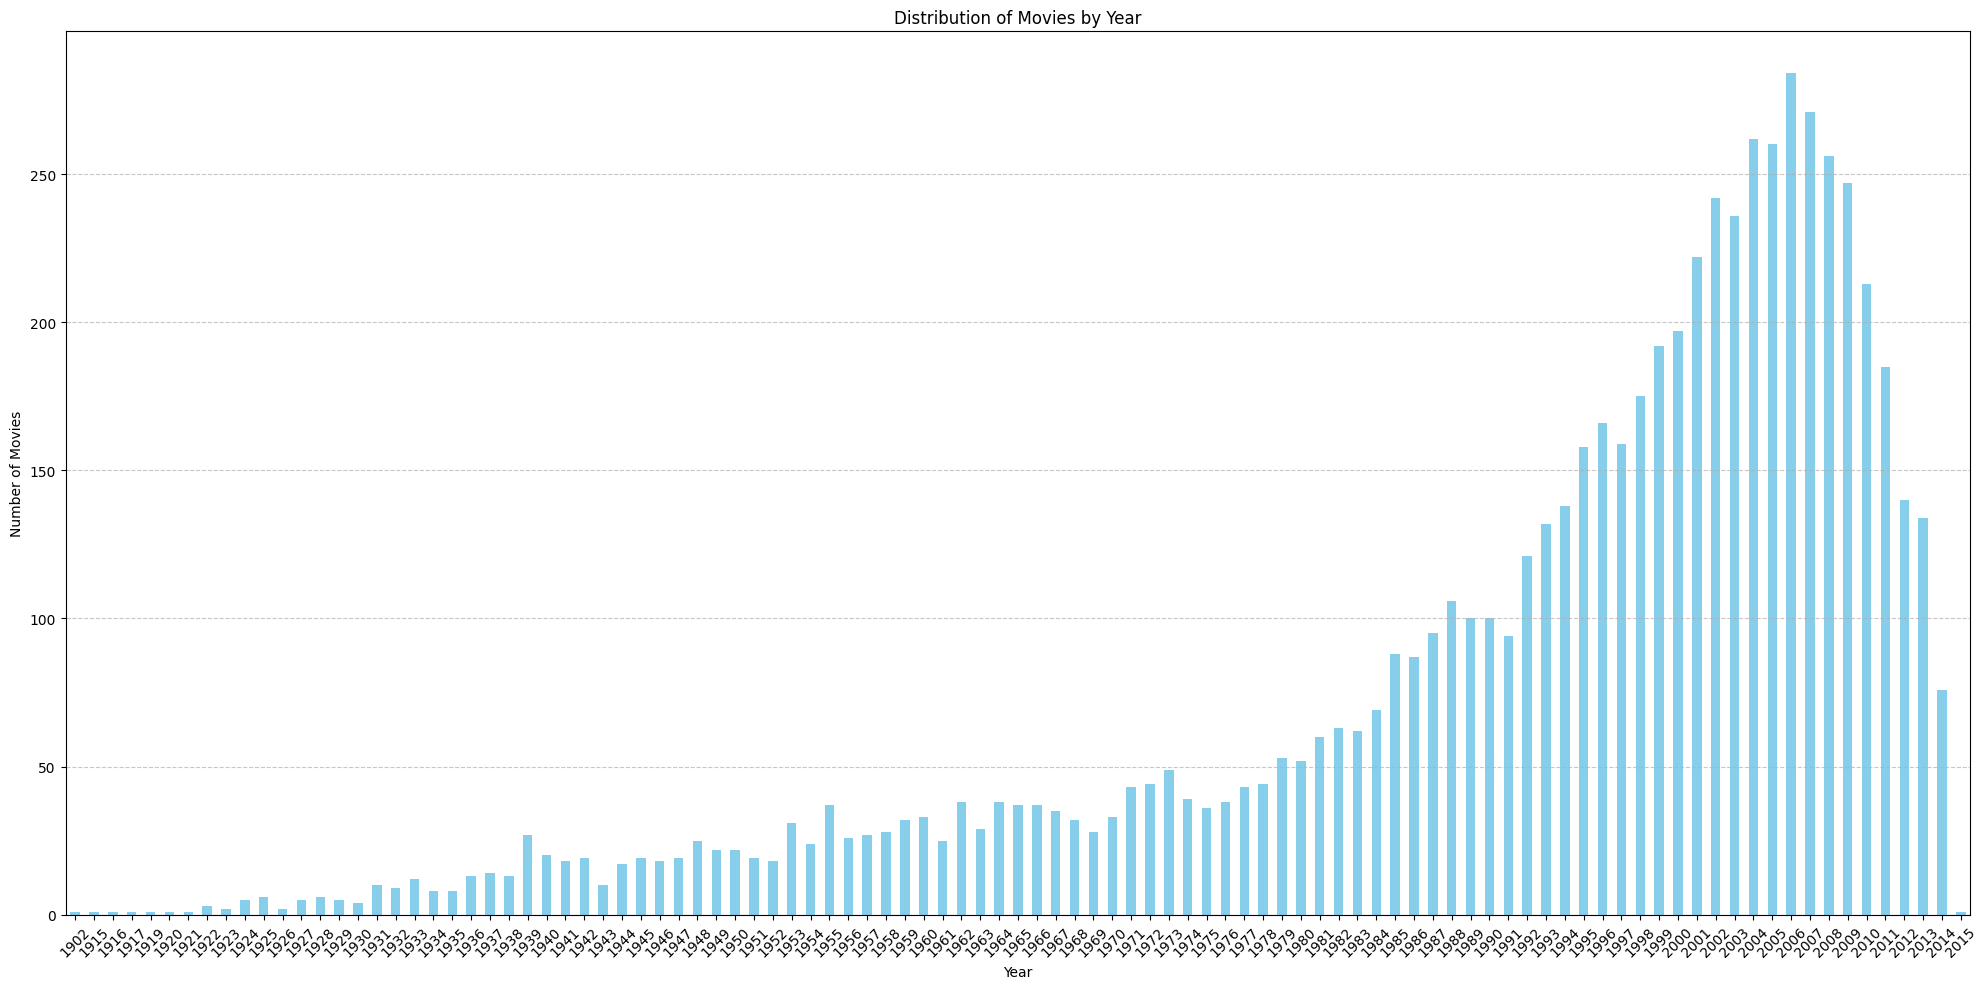

In [9]:
# 연도별 영화 개수 계산
year_counts = title_data['title_year'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(20, 10))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

In [10]:
# 'title' 열 값의 카운트 계산
title_counts = title_data['title'].value_counts()

# 'title' 열 값이 2번 이상 나타나는 행 확인
idx_duplicate_titles = title_counts[title_counts >= 2].index

# 'title' 열 값이 2번 이상 나타나는 행을 추출하여 새로운 데이터프레임 생성
tmp = title_data[title_data['title'].isin(idx_duplicate_titles)]
tmp

,item,title,title_year
349,34048,War of the Worlds (2005),2005
1926,64997,War of the Worlds (2005),2005


In [11]:
# train_df에서 item이 34048인 행의 user 추출 ( 인터렉션 횟수 3,022 번 )
train_users_34048 = set(train_df[train_df['item'] == 34048]['user'])

# train_df에서 item이 64997인 행의 user 추출 ( 인터렉션 횟수 178 번 )
train_users_64997 = set(train_df[train_df['item'] == 64997]['user'])

# 두 집합의 교집합을 구하고 그 개수를 확인
common_users = train_users_34048.intersection(train_users_64997)
num_common_users = len(common_users)

print("두 데이터프레임에서 공통된 'user'의 개수:", num_common_users)

두 데이터프레임에서 공통된 'user'의 개수: 113


---

### 2-3) genre

- 아이템 별 장르

- 유저별 선호 장르


In [12]:
print("genre data shape: ", genre_data.shape)
print("Number of unique items in genre_data: ", genre_data['item'].nunique())
print("Number of unique genres: ", genre_data['genre'].nunique())

print("\nStatistics of genre data: ")
print(genre_data['genre'].describe())

genre data shape:  (15933, 2)
Number of unique items in genre_data:  6807
Number of unique genres:  18

Statistics of genre data: 
count     15933
unique       18
top       Drama
freq       3490
Name: genre, dtype: object


In [13]:
# 전체 genre_data 에서 'genre' 열을 기준으로 그룹화하여 각 장르 별 빈도수 계산
genre_counts = genre_data['genre'].value_counts()

print("장르 별 빈도수:")
print(genre_counts)

장르 별 빈도수:
Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: genre, dtype: int64


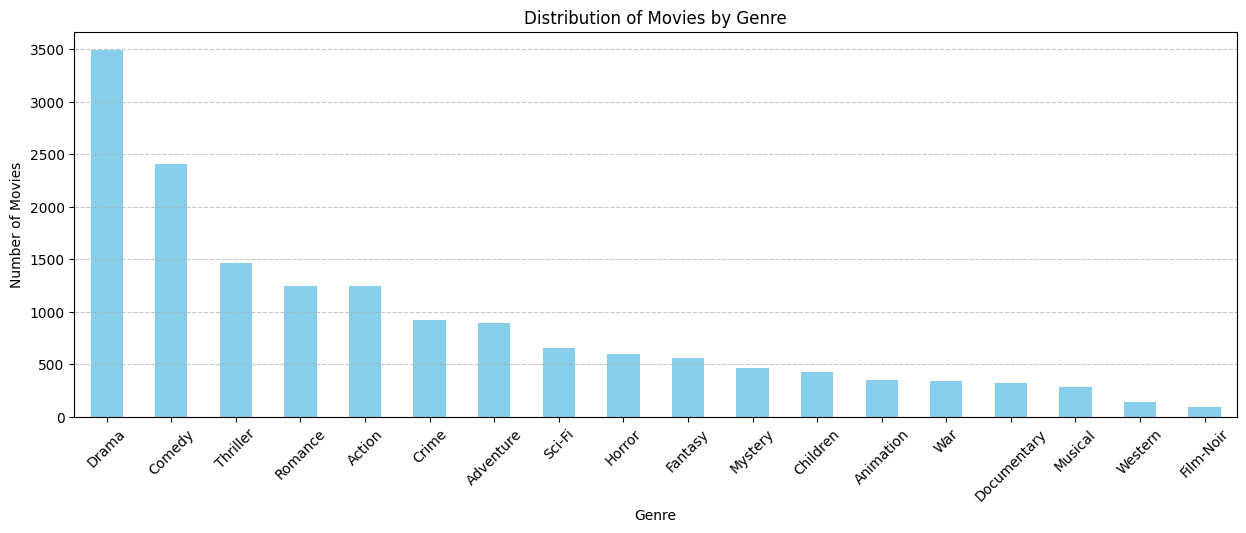

In [14]:
# 드라마 20% 코메디 15% 스릴러 9%

plt.figure(figsize=(15, 5))

# genre_data에서 'genre'열의 값의 개수를 계산하고 막대 그래프로 플로팅
genre_data['genre'].value_counts().plot(kind='bar', rot=45, color='skyblue')

plt.title('Distribution of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

---

#### 영화별 장르 하나로 처리 

- 개수가 낮은것들을 우선 순위로 적용 -> 최대한 골고루 퍼지도록

In [15]:
genre_counts = genre_data['genre'].value_counts(ascending=True)
genre_only_sorted = list(genre_counts.index)
genre_priority = genre_only_sorted

# 장르 우선순위에 따라 작품당 하나의 장르 선택
selected_genres = []
for item, group in genre_data.groupby('item'):
    # 해당 작품에 속한 장르들 중 우선순위가 높은 장르 선택
    selected_genre = None
    for genre in genre_priority:
        if genre in group['genre'].values:
            selected_genre = genre
            break
    
    selected_genres.append(selected_genre)

# 선택된 장르들로 새로운 데이터 프레임 생성
selected_genre_data = pd.DataFrame({
    'item': genre_data['item'].unique(),
    'genre': selected_genres
})

selected_genre_data['genre'].value_counts()

Drama          832
Romance        800
Comedy         772
Crime          619
Mystery        415
Horror         415
Sci-Fi         361
War            316
Documentary    302
Fantasy        301
Animation      283
Musical        274
Adventure      271
Action         210
Children       204
Thriller       197
Western        138
Film-Noir       97
Name: genre, dtype: int64

---

#### 아이템 별 장르 원-핫 인코딩 처리 

In [16]:
genres = genre_data.groupby(['item']).agg({'genre':'unique'})
genres

,genre
item,
1,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,"[Adventure, Children, Fantasy]"
3,"[Comedy, Romance]"
4,"[Comedy, Drama, Romance]"
5,[Comedy]
...,...
118700,[Drama]
118900,[Drama]
118997,"[Children, Comedy, Fantasy, Musical]"


In [17]:
df = genre_data.groupby(['item']).agg({'genre':'unique'})
genre_one_hot_encoded = df['genre'].str.join('|').str.get_dummies()
genre_one_hot_encoded

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
118900,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
118997,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [18]:
# 아이템 별 장르 
# train_df와 genre_one_hot_encoded DataFrame을 아이템 아이디를 기준으로 병합
merged_df = pd.merge(train_df, genre_one_hot_encoded, left_on='item', right_index=True)
merged_df.sort_index(inplace=True)
merged_df

,user,item,time,dates,date,year,month,day,date_count,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,11,4643,1230782529,2009-01-01 04:02:09,2009-01-01,2009,1,1,5,1,...,0,0,0,0,0,0,1,0,0,0
1,11,170,1230782534,2009-01-01 04:02:14,2009-01-01,2009,1,1,5,1,...,0,0,0,0,0,0,0,1,0,0
2,11,531,1230782539,2009-01-01 04:02:19,2009-01-01,2009,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
3,11,616,1230782542,2009-01-01 04:02:22,2009-01-01,2009,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
4,11,2140,1230782563,2009-01-01 04:02:43,2009-01-01,2009,1,1,5,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,2009-12-07,2009,12,7,11,0,...,0,0,0,0,0,0,0,0,0,0
5154467,138493,4958,1260209482,2009-12-07 18:11:22,2009-12-07,2009,12,7,11,1,...,0,0,0,0,0,0,0,0,1,0
5154468,138493,68319,1260209720,2009-12-07 18:15:20,2009-12-07,2009,12,7,11,1,...,0,0,0,0,0,0,1,1,0,0
5154469,138493,40819,1260209726,2009-12-07 18:15:26,2009-12-07,2009,12,7,11,0,...,0,0,0,1,0,1,0,0,0,0


---

#### 유저별 선호 장르

In [19]:
# 유저별 선호 장르
# 유저별로 장르별 시청 횟수 합산
genre_cols = genre_one_hot_encoded.columns.tolist()

user_genre_preference = merged_df.groupby('user')[genre_cols].sum()
user_genre_preference

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user,,,,,,,,,,,,,,,,,,
11,167,133,50,53,99,33,5,112,67,2,58,11,25,44,176,130,12,1
14,23,58,40,57,106,9,0,66,34,0,0,22,6,55,23,10,5,4
18,3,3,1,1,28,20,1,62,3,1,2,2,7,25,2,9,9,4
25,22,21,5,9,40,21,0,41,14,0,6,2,5,17,8,16,5,1
31,92,94,32,44,49,12,2,24,47,0,7,0,9,10,49,36,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,15,12,9,6,6,20,0,37,14,3,8,2,15,8,9,25,1,1
138475,4,8,3,2,26,34,9,76,1,32,5,1,17,27,4,30,12,2
138486,47,39,11,18,53,11,0,34,28,0,57,6,9,11,32,60,3,1


In [20]:
# 유저별 선호 장르
# 각 유저별로 가장 많은 인터렉션이 있던 장르를 찾기
user_genre_preference.idxmax(axis=1)

user
11           Sci-Fi
14           Comedy
18            Drama
25            Drama
31        Adventure
            ...    
138473        Drama
138475        Drama
138486     Thriller
138492       Comedy
138493        Drama
Length: 31360, dtype: object

In [21]:
# 각 유저별로 가장 많은 인터렉션이 있던 장르를 찾기
user_genre_preference['favorite_genre'] = user_genre_preference.idxmax(axis=1)

# 새로운 열로 추가
merged_df['favorite_genre'] = merged_df['user'].map(user_genre_preference['favorite_genre'])
merged_df


,user,item,time,dates,date,year,month,day,date_count,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,favorite_genre
0,11,4643,1230782529,2009-01-01 04:02:09,2009-01-01,2009,1,1,5,1,...,0,0,0,0,0,1,0,0,0,Sci-Fi
1,11,170,1230782534,2009-01-01 04:02:14,2009-01-01,2009,1,1,5,1,...,0,0,0,0,0,0,1,0,0,Sci-Fi
2,11,531,1230782539,2009-01-01 04:02:19,2009-01-01,2009,1,1,5,0,...,0,0,0,0,0,0,0,0,0,Sci-Fi
3,11,616,1230782542,2009-01-01 04:02:22,2009-01-01,2009,1,1,5,0,...,0,0,0,0,0,0,0,0,0,Sci-Fi
4,11,2140,1230782563,2009-01-01 04:02:43,2009-01-01,2009,1,1,5,0,...,0,0,0,0,0,0,0,0,0,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,2009-12-07,2009,12,7,11,0,...,0,0,0,0,0,0,0,0,0,Drama
5154467,138493,4958,1260209482,2009-12-07 18:11:22,2009-12-07,2009,12,7,11,1,...,0,0,0,0,0,0,0,1,0,Drama
5154468,138493,68319,1260209720,2009-12-07 18:15:20,2009-12-07,2009,12,7,11,1,...,0,0,0,0,0,1,1,0,0,Drama
5154469,138493,40819,1260209726,2009-12-07 18:15:26,2009-12-07,2009,12,7,11,0,...,0,0,1,0,1,0,0,0,0,Drama


In [22]:
# 나머지열 삭제
merged_df.drop(columns=genre_cols, inplace=True)
merged_df

,user,item,time,dates,date,year,month,day,date_count,favorite_genre
0,11,4643,1230782529,2009-01-01 04:02:09,2009-01-01,2009,1,1,5,Sci-Fi
1,11,170,1230782534,2009-01-01 04:02:14,2009-01-01,2009,1,1,5,Sci-Fi
2,11,531,1230782539,2009-01-01 04:02:19,2009-01-01,2009,1,1,5,Sci-Fi
3,11,616,1230782542,2009-01-01 04:02:22,2009-01-01,2009,1,1,5,Sci-Fi
4,11,2140,1230782563,2009-01-01 04:02:43,2009-01-01,2009,1,1,5,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,2009-12-07,2009,12,7,11,Drama
5154467,138493,4958,1260209482,2009-12-07 18:11:22,2009-12-07,2009,12,7,11,Drama
5154468,138493,68319,1260209720,2009-12-07 18:15:20,2009-12-07,2009,12,7,11,Drama
5154469,138493,40819,1260209726,2009-12-07 18:15:26,2009-12-07,2009,12,7,11,Drama


---

### 2-4) directors

- `item` : 영화 id.
- `director` : 영화 감독. (익명화)
- 하나의 영화는 여러 명의 감독을 가질 수 있습니다.
- ratings 와 비교하여 결측치 약 19%


In [23]:
print("director data shape: ", director_data.shape)

print("Number of unique items in director: ", director_data['item'].nunique())

print("Number of unique director: ", director_data['director'].nunique())

print("\nStatistics of director data: ")
print(genre_data['genre'].describe())

director data shape:  (5905, 2)
Number of unique items in director:  5503
Number of unique director:  1340

Statistics of director data: 
count     15933
unique       18
top       Drama
freq       3490
Name: genre, dtype: object


In [24]:
multiple_writers = director_data.groupby('item').filter(lambda x: len(x['director']) >= 2)
multiple_writers = multiple_writers.sort_values(by='item')
multiple_writers

,item,director
432,18,nm0000233
1875,18,nm0001675
2365,18,nm0005062
2084,29,nm0001988
714,29,nm0000466
...,...,...
5887,115617,nm2320658
3372,117881,nm0322144
5498,117881,nm0922903
4854,119141,nm0736622


In [25]:
def calculate_missing_ratio(total_data_points, unique_writer_ids):
    missing_ratio = ((total_data_points - unique_writer_ids) / total_data_points) * 100
    return missing_ratio

total_data_points = 6807
unique_writer_ids = 5503

missing_ratio = calculate_missing_ratio(total_data_points, unique_writer_ids)
print("결측치의 비율은 약 {:.2f}% 입니다.".format(missing_ratio))

결측치의 비율은 약 19.16% 입니다.


---

### 2-5) writers
- `item` : 영화 id.
- `writer` : 영화의 각본가. (익명화)
- 하나의 영화는 여러 명의 각본가 를 가질 수 있습니다.
- ratings 와 비교하여 결측치 약 17%

In [26]:
print("writer data shape: ", writer_data.shape)
print("Number of unique items in writer_df: ", writer_data['item'].nunique())
print("Number of unique writers: ", writer_data['writer'].nunique())

print ("\nStatistics of write data: ")
writer_data['writer'].describe()

writer data shape:  (11306, 2)
Number of unique items in writer_df:  5648
Number of unique writers:  2989

Statistics of write data: 


count         11306
unique         2989
top       nm0000095
freq             47
Name: writer, dtype: object

In [27]:
multiple_writers = writer_data.groupby('item').filter(lambda x: len(x['writer']) >= 2)
multiple_writers = multiple_writers.sort_values(by='item')
multiple_writers

,item,writer
10205,1,nm0923736
2053,1,nm0005124
1942,1,nm0004056
8254,1,nm0710020
3953,1,nm0230032
...,...,...
8531,119141,nm0736622
11082,119145,nm1733301
10594,119145,nm0963359
9875,119145,nm0891216


In [28]:
def calculate_missing_ratio(total_data_points, unique_writer_ids):
    missing_ratio = ((total_data_points - unique_writer_ids) / total_data_points) * 100
    return missing_ratio

total_data_points = 6807
unique_writer_ids = 5648

missing_ratio = calculate_missing_ratio(total_data_points, unique_writer_ids)
print("결측치의 비율은 약 {:.2f}% 입니다.".format(missing_ratio))

결측치의 비율은 약 17.03% 입니다.


---

## 가설 1) 영화 추천시 interaction이 적은 영화를 추천해주는게 맞나?

- 1. interaction 평가 갯수가 적다 -> 인기가 없는
- 2. interaction 평가 갯수가 적다 -> 최신 작품 
- 3. interaction 평가 갯수가 적다 -> 마이너 장르 가능성


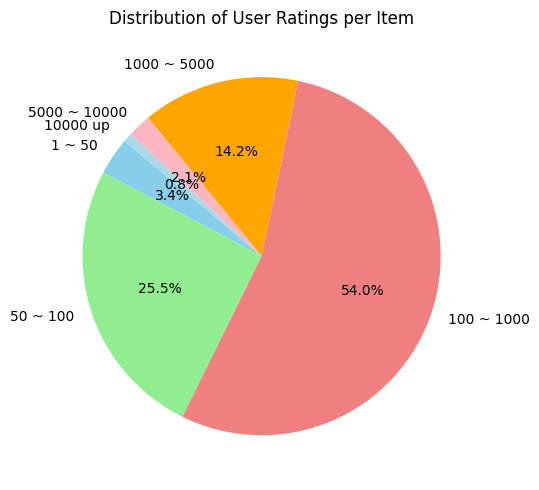

In [29]:

# 데이터
item_counts = train_df['item'].value_counts()

# 범주에 따라 데이터 분류
count_categories = {
    '1 ~ 50': item_counts[(item_counts >= 1) & (item_counts < 50)].count(),
    '50 ~ 100': item_counts[(item_counts >= 50) & (item_counts < 100)].count(),
    '100 ~ 1000': item_counts[(item_counts >= 100) & (item_counts < 1000)].count(),
    '1000 ~ 5000': item_counts[(item_counts >= 1000) & (item_counts < 5000)].count(),
    '5000 ~ 10000': item_counts[(item_counts >= 5000) & (item_counts < 10000)].count(),
    '10000 up ': item_counts[item_counts >= 10000].count()
}

# Plotting
plt.figure(figsize=(10, 5))
plt.pie(count_categories.values(), labels=count_categories.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightblue'])
plt.title('Distribution of User Ratings per Item')

plt.tight_layout()
plt.show()


---

## 가설 2) Rating interaction 차이가 크다.

- 유저별로 interaction 횟수 차이가 크다. 
- 한 유저당 1000번 이상 interaction 약 4% -> 어뷰징 유저 -> 제거 고려 

In [30]:
# 데이터
user_counts = train_df['user'].value_counts()
user_counts

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [31]:
user_counts.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: user, dtype: float64

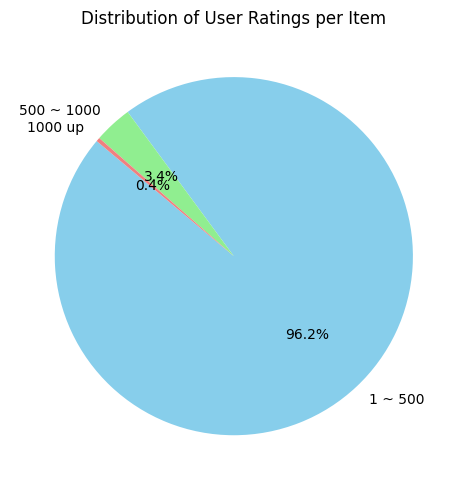

In [32]:
# 범주에 따라 데이터 분류
count_categories = {
    '1 ~ 500': user_counts[(user_counts >= 1) & (user_counts <= 500)].count(),
    '500 ~ 1000': user_counts[(user_counts > 500) & (user_counts <= 1000)].count(),
    '1000 up': user_counts[user_counts > 1000].count()
}

# Plotting
plt.figure(figsize=(10, 5))
plt.pie(count_categories.values(), labels=count_categories.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of User Ratings per Item')

plt.tight_layout()
plt.show()


In [33]:
train_df[train_df['user']==8405] # 2006년부터 2014년까지 207일에 걸쳐서 평가 인터렉션

,user,item,time,dates,date,year,month,day,date_count
315136,8405,1252,1160462492,2006-10-10 06:41:32,2006-10-10,2006,10,10,207
315137,8405,1278,1160462504,2006-10-10 06:41:44,2006-10-10,2006,10,10,207
315138,8405,2599,1160462620,2006-10-10 06:43:40,2006-10-10,2006,10,10,207
315139,8405,3408,1160462658,2006-10-10 06:44:18,2006-10-10,2006,10,10,207
315140,8405,2268,1160462698,2006-10-10 06:44:58,2006-10-10,2006,10,10,207
...,...,...,...,...,...,...,...,...,...
318043,8405,1967,1336360450,2012-05-07 03:14:10,2012-05-07,2012,5,7,207
318044,8405,2966,1344146938,2012-08-05 06:08:58,2012-08-05,2012,8,5,207
318045,8405,356,1344220422,2012-08-06 02:33:42,2012-08-06,2012,8,6,207
318046,8405,69685,1359355760,2013-01-28 06:49:20,2013-01-28,2013,1,28,207


In [34]:
train_df[train_df['user']==91349] # 하루만에 1795개 영화 평가함 <- 신뢰도 -- <- 어뷰징 처리

,user,item,time,dates,date,year,month,day,date_count
3425217,91349,1321,1405583896,2014-07-17 07:58:16,2014-07-17,2014,7,17,1
3425218,91349,1373,1405583901,2014-07-17 07:58:21,2014-07-17,2014,7,17,1
3425219,91349,1831,1405583904,2014-07-17 07:58:24,2014-07-17,2014,7,17,1
3425220,91349,1912,1405583908,2014-07-17 07:58:28,2014-07-17,2014,7,17,1
3425221,91349,3174,1405583915,2014-07-17 07:58:35,2014-07-17,2014,7,17,1
...,...,...,...,...,...,...,...,...,...
3427007,91349,31950,1405604811,2014-07-17 13:46:51,2014-07-17,2014,7,17,1
3427008,91349,3052,1405604825,2014-07-17 13:47:05,2014-07-17,2014,7,17,1
3427009,91349,4932,1405604828,2014-07-17 13:47:08,2014-07-17,2014,7,17,1
3427010,91349,3812,1405604837,2014-07-17 13:47:17,2014-07-17,2014,7,17,1


---